In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 导入 tensorflow。mnist 数据集工具包
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# 载入数据集
# 
# 下载 数据集
# 将标签转换为 one_hot 编码形式
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# tensorflow 版本更新,以前的数据集下载等 方法将不再支持,回警告！！！

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# 定义迭代次数
epochs = 20

# 定义每次批次的大小
batch_size = 100
# 定义批次次数
n_batch = mnist.train.num_examples // batch_size

# 打印
print(n_batch)

550


In [4]:
# 创建 3 个占位符
# 
# 输入样本、输入标签
x = tf.placeholder(dtype=tf.float32, shape=(None, 784))
y = tf.placeholder(dtype=tf.float32, shape=(None, 10))

# dropout 参数设置
keep_prob = tf.placeholder(dtype=tf.float32)

In [5]:
# 创建神经网络
# 
# 输入层
weight_L1 = tf.Variable(tf.truncated_normal(shape=(784, 500), mean=0, stddev=0.1))
biase_L1 = tf.Variable(tf.zeros(shape=(1, 500)) + 0.1)
wx_plus_b_L1 = tf.matmul(x, weight_L1) + biase_L1

# 双曲正切函数作为激活函数
L1 = tf.nn.tanh(x=wx_plus_b_L1)

# Dropout 层
# 
# x 为该层神经元输出，keep_prob 为每层神经元工作比
L1_dropout = tf.nn.dropout(x=L1, keep_prob=keep_prob)

In [6]:
# 中间层
# 
weight_L2 = tf.Variable(tf.truncated_normal(shape=(500, 300), mean=0, stddev=0.1))
biase_L2 = tf.Variable(tf.zeros(shape=(1, 300)) + 0.1)
wx_plus_b_L2 = tf.matmul(L1_dropout, weight_L2) + biase_L2

# 激活函数 tanh()
L2 = tf.nn.tanh(x=wx_plus_b_L2)

# Dropout 层
# 
L2_dropout = tf.nn.dropout(x=L2, keep_prob=keep_prob)

# # 创建输出层
# prediction = tf.nn.softmax(wx_plus_b_L2)

In [7]:
# 输出层
# 
weight_L3 = tf.Variable(tf.truncated_normal(shape=(300, 10), mean=0, stddev=0.1))
biase_L3 = tf.Variable(tf.truncated_normal(shape=(1, 10), mean=0, stddev=0.1))
wx_plus_b_L3 = tf.matmul(L2_dropout, weight_L3) + biase_L3

# 激活函数 tanh()
prediction = tf.nn.softmax(wx_plus_b_L3)

In [8]:
# 损失函数、优化器
# 
# 定义损失函数 对数似然代价函数与 soft 组合
# 
# 训练时间、准确度有所提升
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction))

# 创建优化器，优化损失函数
# 
# 使用变量初始化学习率
lr = tf.Variable(initial_value=0.001, dtype=tf.float32)

train = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
# 判断准去率
# 
# tf.equal(x, y),判断 x, y 是否相等，返回 bool 类型 (tensor 里的值为 bool)
# tf.argmax() 查找最大值，返回索引值
# tensor 的轴(是从 0 开始的)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1))

# tf.case() 将 bool 类型,转换为 tf.float 类型
# 
# 疑问：acc 为什么 会有 4 位小数，出现呢？(tensor(100, 10), 里面不 1 就是 0)，我怎么感觉顶天就是 2 位小数
# 解答：准确率是测试集，测试的(10000)张照片,固有 4 位小数出现
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# print(type(correct_prediction))
# print(type(accuracy))

In [10]:
# 初始化图中变量
init_op = tf.global_variables_initializer()

Ietr 0   Testing Accuracy 0.9501   loss= 1.4718955   learning_rate 0.001
Ietr 1   Testing Accuracy 0.9594   loss= 1.4992715   learning_rate 0.00096
Ietr 2   Testing Accuracy 0.9652   loss= 1.4690492   learning_rate 0.0009216
Ietr 3   Testing Accuracy 0.9684   loss= 1.4829522   learning_rate 0.000884736
Ietr 4   Testing Accuracy 0.9705   loss= 1.5007876   learning_rate 0.0008493466
Ietr 5   Testing Accuracy 0.9732   loss= 1.4670458   learning_rate 0.0008153727
Ietr 6   Testing Accuracy 0.9744   loss= 1.4766684   learning_rate 0.00078275776
Ietr 7   Testing Accuracy 0.9763   loss= 1.4616876   learning_rate 0.00075144746
Ietr 8   Testing Accuracy 0.9764   loss= 1.4836795   learning_rate 0.0007213896
Ietr 9   Testing Accuracy 0.9771   loss= 1.4675773   learning_rate 0.00069253397
Ietr 10   Testing Accuracy 0.978   loss= 1.4615316   learning_rate 0.00066483265
Ietr 11   Testing Accuracy 0.9771   loss= 1.4628638   learning_rate 0.0006382393
Ietr 12   Testing Accuracy 0.9744   loss= 1.461602 

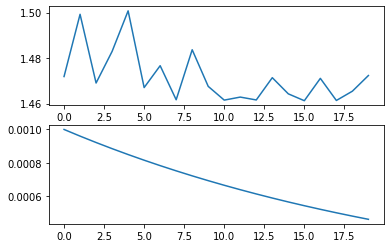

In [11]:
# 创建会话
with tf.Session() as sess:
    sess.run(init_op)
#     定义列表存储 loss
#     迭代 21 个周期
    loss_list = []
    lr_list = []
    for epoch in range(epochs):
#         执行批次数
#         学习率随迭代次数，随之着变化
        res_lr = sess.run(tf.assign(ref=lr, value=(0.001 * (0.96 ** epoch))))
        for batch in range(n_batch):
#         一个批次获取照片数 batch_size
            train_x, train_y = mnist.train.next_batch(batch_size=batch_size)
           
#             res_loss 为 loss, res_train ?
#             训练迭代时，处最后一层外的其他层有 keep_prob 的比例工作
            res_loss, res_train = sess.run([loss, train], feed_dict={x: train_x, y: train_y, keep_prob: 1})
        
#         计算网络 准确率
#         测试 Dropout 设为 1， 全部神经网络都工作
        test_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0})
        
#         将每一次迭代 loss 记录
        loss_list.append(res_loss)

#         记录每次迭代的学习率
        lr_list.append(res_lr)
        print('Ietr ' + str(epoch) , '  Testing Accuracy ' + str(test_acc), '  loss=', res_loss, '  learning_rate ' + str(res_lr))
        
#   画出 loss-epoch 关系图
    plt.figure()
    plt.subplot(211)
    plt.plot(list(range(epochs)), loss_list)
    
#   画出 learning_rate-epoch 关系图
    plt.subplot(212)
    plt.plot(list(range(epochs)), lr_list)
    plt.show()

In [ ]:
# 没有使用 Dropout

# Ietr 0  Testing Accuracy 0.9323   Train Accuracy 0.9346   res_loss= 1.5399612
# Ietr 1  Testing Accuracy 0.9541   Train Accuracy 0.96132725   res_loss= 1.4838237
# Ietr 2  Testing Accuracy 0.9602   Train Accuracy 0.9728909   res_loss= 1.49783
# Ietr 3  Testing Accuracy 0.9632   Train Accuracy 0.97932726   res_loss= 1.4796754
# Ietr 4  Testing Accuracy 0.9679   Train Accuracy 0.9825636   res_loss= 1.4844207
# Ietr 5  Testing Accuracy 0.9698   Train Accuracy 0.9851091   res_loss= 1.4629455
# Ietr 6  Testing Accuracy 0.969   Train Accuracy 0.9863091   res_loss= 1.4843254
# Ietr 7  Testing Accuracy 0.9721   Train Accuracy 0.98794544   res_loss= 1.4735485
# Ietr 8  Testing Accuracy 0.9725   Train Accuracy 0.98905456   res_loss= 1.4721011
# Ietr 9  Testing Accuracy 0.9743   Train Accuracy 0.98965454   res_loss= 1.4730831
# Ietr 10  Testing Accuracy 0.9747   Train Accuracy 0.9900909   res_loss= 1.491473
# Ietr 11  Testing Accuracy 0.9747   Train Accuracy 0.9906545   res_loss= 1.4817348
# Ietr 12  Testing Accuracy 0.9755   Train Accuracy 0.99096364   res_loss= 1.4821503
# Ietr 13  Testing Accuracy 0.9745   Train Accuracy 0.9914   res_loss= 1.4813396
# Ietr 14  Testing Accuracy 0.9763   Train Accuracy 0.99178183   res_loss= 1.473033
# Ietr 15  Testing Accuracy 0.9755   Train Accuracy 0.99203634   res_loss= 1.4718902
# Ietr 16  Testing Accuracy 0.9759   Train Accuracy 0.9923091   res_loss= 1.482006
# Ietr 17  Testing Accuracy 0.9756   Train Accuracy 0.9926182   res_loss= 1.4619377
# Ietr 18  Testing Accuracy 0.9762   Train Accuracy 0.9927818   res_loss= 1.4716164
# Ietr 19  Testing Accuracy 0.976   Train Accuracy 0.9930182   res_loss= 1.501292